In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings

from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [4]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

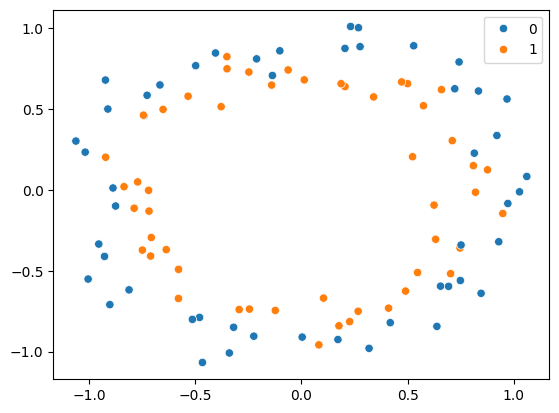

In [6]:
sns.scatterplot(x = X[:,0],y = X[:,1],hue=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [9]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

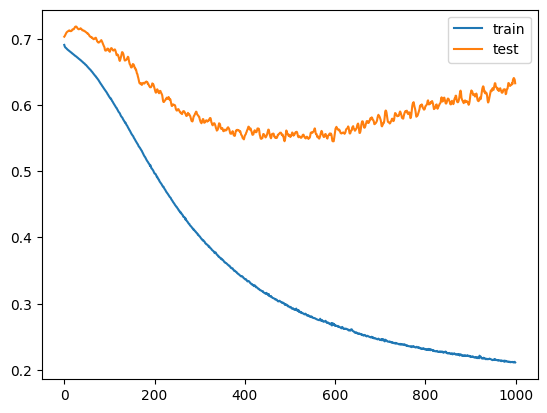

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 25s 3ms/step


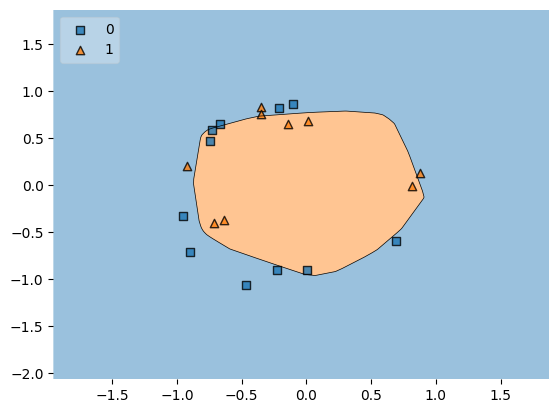

In [13]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [15]:
# Early Stopping

model1 = Sequential()

model.add(Dense(256,activation = 'relu',input_dim = 2))
model.add(Dense(1,activation = 'sigmoid'))

In [16]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [18]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1500, callbacks=callback)

Epoch 1/1500
3/3 [==============================] - 2s 123ms/step - loss: 0.6740 - accuracy: 0.5125 - val_loss: 0.6800 - val_accuracy: 0.4500
Epoch 2/1500
3/3 [==============================] - 0s 37ms/step - loss: 0.6338 - accuracy: 0.5125 - val_loss: 0.6744 - val_accuracy: 0.4500
Epoch 3/1500
3/3 [==============================] - 0s 29ms/step - loss: 0.5998 - accuracy: 0.5500 - val_loss: 0.6699 - val_accuracy: 0.5500
Epoch 4/1500
3/3 [==============================] - 0s 23ms/step - loss: 0.5766 - accuracy: 0.6625 - val_loss: 0.6673 - val_accuracy: 0.6000
Epoch 5/1500
3/3 [==============================] - 0s 31ms/step - loss: 0.5542 - accuracy: 0.7625 - val_loss: 0.6627 - val_accuracy: 0.6000
Epoch 6/1500
3/3 [==============================] - 0s 22ms/step - loss: 0.5312 - accuracy: 0.8125 - val_loss: 0.6601 - val_accuracy: 0.5500
Epoch 7/1500
3/3 [==============================] - 0s 29ms/step - loss: 0.5112 - accuracy: 0.8625 - val_loss: 0.6615 - val_accuracy: 0.5500
Epoch 8/1500

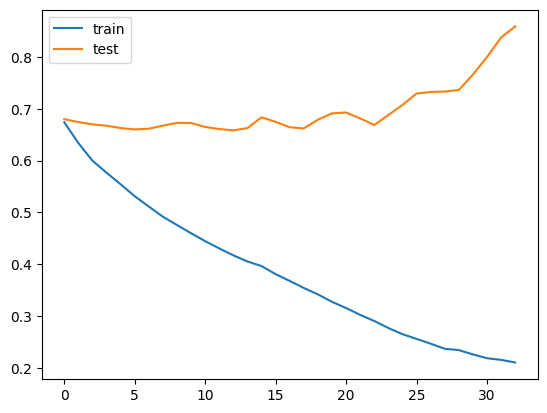

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 23s 2ms/step


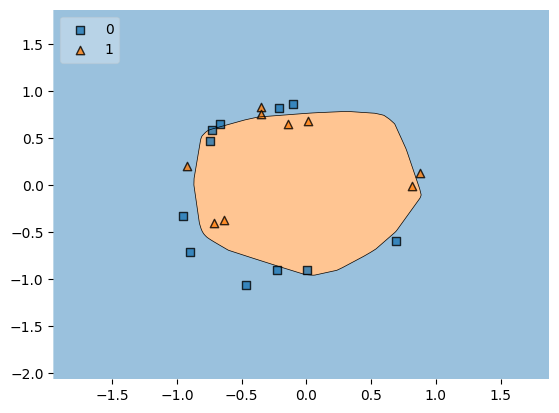

In [19]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()